<a href="https://colab.research.google.com/github/ChristianCasino/AIDA_LAB-CPE/blob/main/F4_Berba_Camay_Casino_Garcia_Correlation_and_Autocorrelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory 04: Correlation and Autocorrelation

##$_{\text{© F4:BERBA, CAMAY, CASINO, GARCIA | 2022 | Fudamentals of Machine Learning}}$

# Correlation and Autocorrelation
> A Summary of lecture "Time Series Analysis in Python", via datacamp

- toc: true 
- badges: true
- comments: true
- author: BERBA
- categories: [Python, Datacamp, Time-Series Analysis]
- image: images/dji_ufo.png

### A "Thin" Application of Time Series
[Google Trends](https://trends.google.com/trends/) allows users to see how often a term is searched for. We downloaded a file from Google Trends containing the frequency over time for the search word "diet". A first step when analyzing a time series is to visualize the data with a plot. You should be able to clearly see a gradual decrease in searches for "diet" throughout the calendar year, hitting a low around the December holidays, followed by a spike in searches around the new year as people make New Year's resolutions to lose weight.

Like many time series datasets you will be working with, the index of dates are strings and should be converted to a datetime index before plotting.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:

movie_metadata = pd.read_csv("hhttps://github.com/PeriBerba/AIDA-2-Machine-Learning/blob/main/movie_metadata_cleaned.csv") 
data = movie_metadata.head()
data 


,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,2,Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,3,The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,4,Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.0,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0


In [ ]:
budget = movie_metadata["budget"]
imdb_score = movie_metadata["imdb_score"]



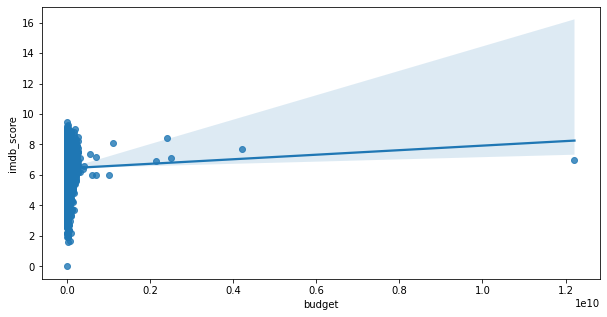

In [ ]:
budget = movie_metadata["budget"]
imdb_score = movie_metadata["imdb_score"]
correlation = budget.corr(imdb_score) #to find the  correlation between  "budget" & "imdb_score" columns

sns.regplot(x=movie_metadata["budget"], y=movie_metadata["imdb_score"]) #Correlation Scatterplot between the Movie Budget and the Movie Rating given by imdb 

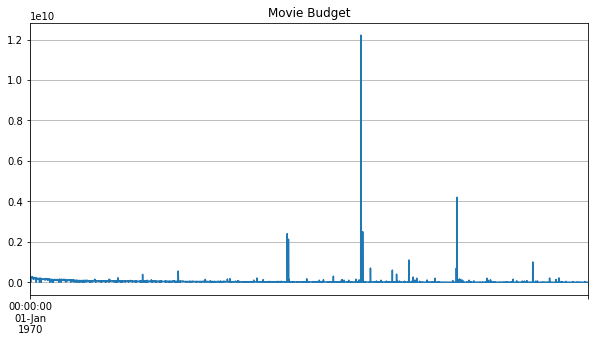

In [ ]:
budget.plot(grid=True); # Plot the movie budget data and show gridlines
plt.title('Movie Budget');

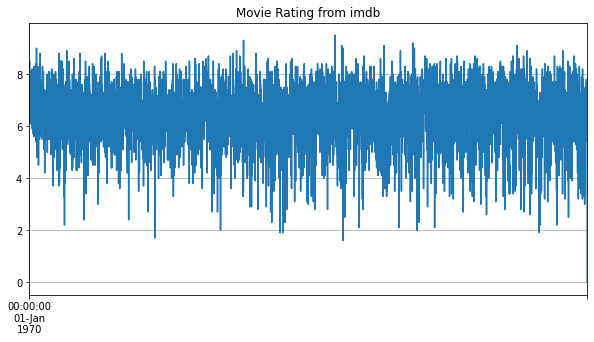

In [ ]:
imdb_score.plot(grid=True);  # Plot the movie rating data and show gridlines
plt.title('Movie Rating from imdb');

**Simple Linear Regression**

In [ ]:
import statsmodels.api as sm

# Compute correlation of x and y
correlation = budget.corr(imdb_score)
print("The correlation between the movie budget and the movie rating from imdb is %4.2f" % (correlation))
print("\n")

# Convert the Series x(budget) to a DataFrame and name the column x(budget)
dfx = pd.DataFrame(budget, columns=['budget'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

# Regress y(imdb_score) on dfx1
result = sm.OLS(imdb_score, dfx1).fit()

print(result.summary())

The correlation between the movie budget and the movie rating from imdb is 0.03


                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.382
Date:                Sun, 09 Oct 2022   Prob (F-statistic):             0.0660
Time:                        07:51:22   Log-Likelihood:                -7765.4
No. Observations:                5044   AIC:                         1.553e+04
Df Residuals:                    5042   BIC:                         1.555e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
